Homework #1 CPE 595-WN
Chanmaly Matchittom
9/26/2024 

# Program to find the coefficients for a linear regression model. Assume a linear model: y = w0 + w1*x

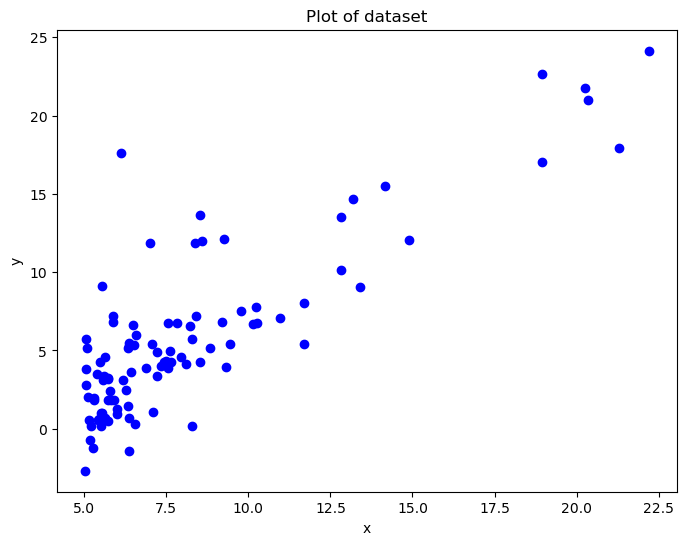

In [38]:
import numpy as np
import matplotlib.pyplot as plt

#Load dataset 
data = np.loadtxt('data2.txt', delimiter=',')
x = data[:, 0]
y = data[:, 1]

#Plot data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of dataset')
plt.show()

In [40]:
#Add intercept term to x

X = np.c_[np.ones(x.shape[0]), x]

#Normal equation to find w0 and w1
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

#Calculate the coefficients using the normal equation
theta_normal = normal_equation(X, y)
print(f"Coefficients from Normal Equation: w0 = {theta_normal[0]}, w1 = {theta_normal[1]}")

Coefficients from Normal Equation: w0 = -3.8957808783118772, w1 = 1.1930336441895957


In [42]:
#Split Dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
#Define the cost function (MSE)

def compute_cost(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((X @ theta - y) ** 2)



In [46]:
#Batch Gradient Descent

def batch_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradients = (1/m) * X.T @ (X @ theta - y)
        theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

#Initialize parameters

theta_initial = np.zeros(2)
learning_rate = 0.01
iterations = 1000

#Run batch gradient descent
theta_batch, cost_history_batch = batch_gradient_descent(X, y, theta_initial, learning_rate, iterations)
print(f"Coefficients from Batch Gradient Descent: w0 = {theta_batch[0]}, w1 = {theta_batch[1]}")


Coefficients from Batch Gradient Descent: w0 = -3.241402144274422, w1 = 1.1272942024281842


In [48]:
#Stochastic Gradient Descent

def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        cost = 0
        for j in range(m):
            rand_index = np.random.randint(0, m)
            X_j = X[rand_index:rand_index+1]
            y_j = y[rand_index:rand_index+1]
            gradients = X_j.T @ (X_j @ theta - y_j)
            theta -= learning_rate * gradients
            cost += compute_cost(X, y, theta)

        cost_history.append(cost / m)

    return theta, cost_history

#Run stochastic gradient descent
theta_stochastic, cost_history_stochastic = stochastic_gradient_descent(X, y, theta_initial, learning_rate, iterations)
print(f"Coefficients from Stochastic Gradient Descent: w0 = {theta_stochastic[0]}, w1 = {theta_stochastic[1]}")


Coefficients from Stochastic Gradient Descent: w0 = -2.9289741441705663, w1 = -2.9144011561277843


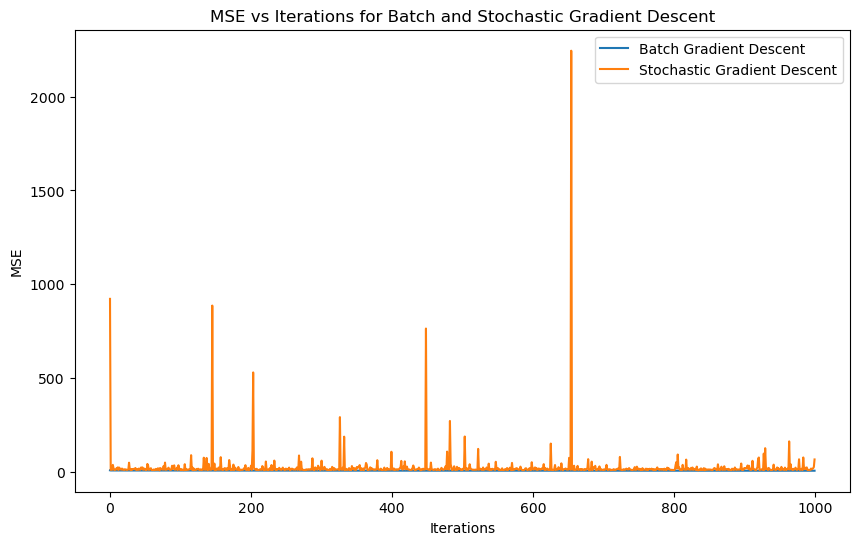

In [50]:
#Plot MSE vs Iterations

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history_batch, label='Batch Gradient Descent')
plt.plot(range(iterations), cost_history_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE vs Iterations for Batch and Stochastic Gradient Descent')
plt.legend()
plt.show()

/var/folders/71/drc9z8q900n3m3vhr6rbl7jh0000gn/T/ipykernel_56403/3265153427.py:5: RuntimeWarning: overflow encountered in square
  return (1/(2*m)) * np.sum((X @ theta - y) ** 2)
/var/folders/71/drc9z8q900n3m3vhr6rbl7jh0000gn/T/ipykernel_56403/3779621697.py:13: RuntimeWarning: overflow encountered in matmul
  gradients = X_j.T @ (X_j @ theta - y_j)
/var/folders/71/drc9z8q900n3m3vhr6rbl7jh0000gn/T/ipykernel_56403/3779621697.py:14: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


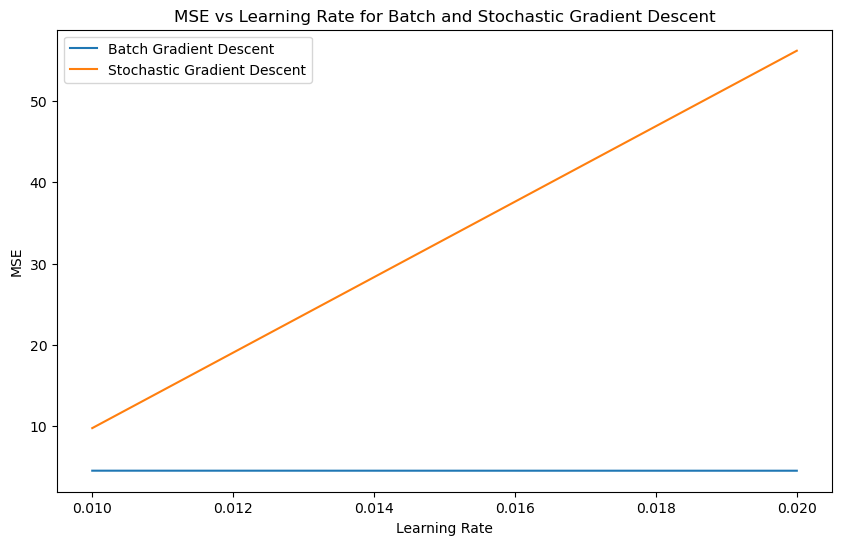

In [52]:
#Plot MSE vs Learning Rate

learning_rates = np.linspace(0.01, 0.1, 10)
batch_costs = []
stochastic_costs = []

for lr in learning_rates:
    _, cost_history_batch = batch_gradient_descent(X, y, theta_initial, lr, iterations)
    _, cost_history_stochastic = stochastic_gradient_descent(X, y, theta_initial, lr, iterations)
    batch_costs.append(cost_history_batch[-1])
    stochastic_costs.append(cost_history_stochastic[-1])

# Plot MSE vs Learning Rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, batch_costs, label='Batch Gradient Descent')
plt.plot(learning_rates, stochastic_costs, label='Stochastic Gradient Descent')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('MSE vs Learning Rate for Batch and Stochastic Gradient Descent')
plt.legend()
plt.show()
